In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import statsmodels.api as sm

In [7]:
%matplotlib inline

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
from sklearn.feature_selection import RFE

In [11]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [12]:
from sklearn.svm import LinearSVC

In [13]:
from sklearn.feature_selection import SelectFromModel

In [14]:
from sklearn import metrics

In [15]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
import math

In [633]:
df = pd.read_csv('../../data/extracted_features_round4_training.csv', header=0)

In [634]:
df = df.drop(columns='Unnamed: 0')

In [635]:
df = df[['CV', 'TABSSIMPSPACY', 'TAWSSIMSPACY', 'TAKWDIST', 'TABSSIMBERT',
       'TAWSSIMPSPACY', 'TP', 'AKWPWMEAN', 'TKWAORATIO', 'TABSSIMSPACY',
       'TMIKWP', 'TAMIKWWSSIMSPACY', 'TAFSSD', 'TAFSPD', 'TAKWSPD', 'TKWC',
       'TSCCRATIO', 'TAFSSIMSPACY']]

In [614]:
scaler = StandardScaler()

In [637]:
X = df.drop(columns='CV')

In [616]:
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns,index = df.index)

In [638]:
y = df['CV']

In [522]:
df.columns

Index(['CV', 'TL', 'AL', 'TWC', 'AWC', 'TSC', 'ASC', 'TALRATIO', 'TAWCRATIO',
       'TASCRATIO', 'TP', 'AP', 'TAPD', 'TAPMEAN', 'TS', 'AS', 'TASD',
       'TASMEAN'],
      dtype='object')

In [352]:
cor = df.corr()

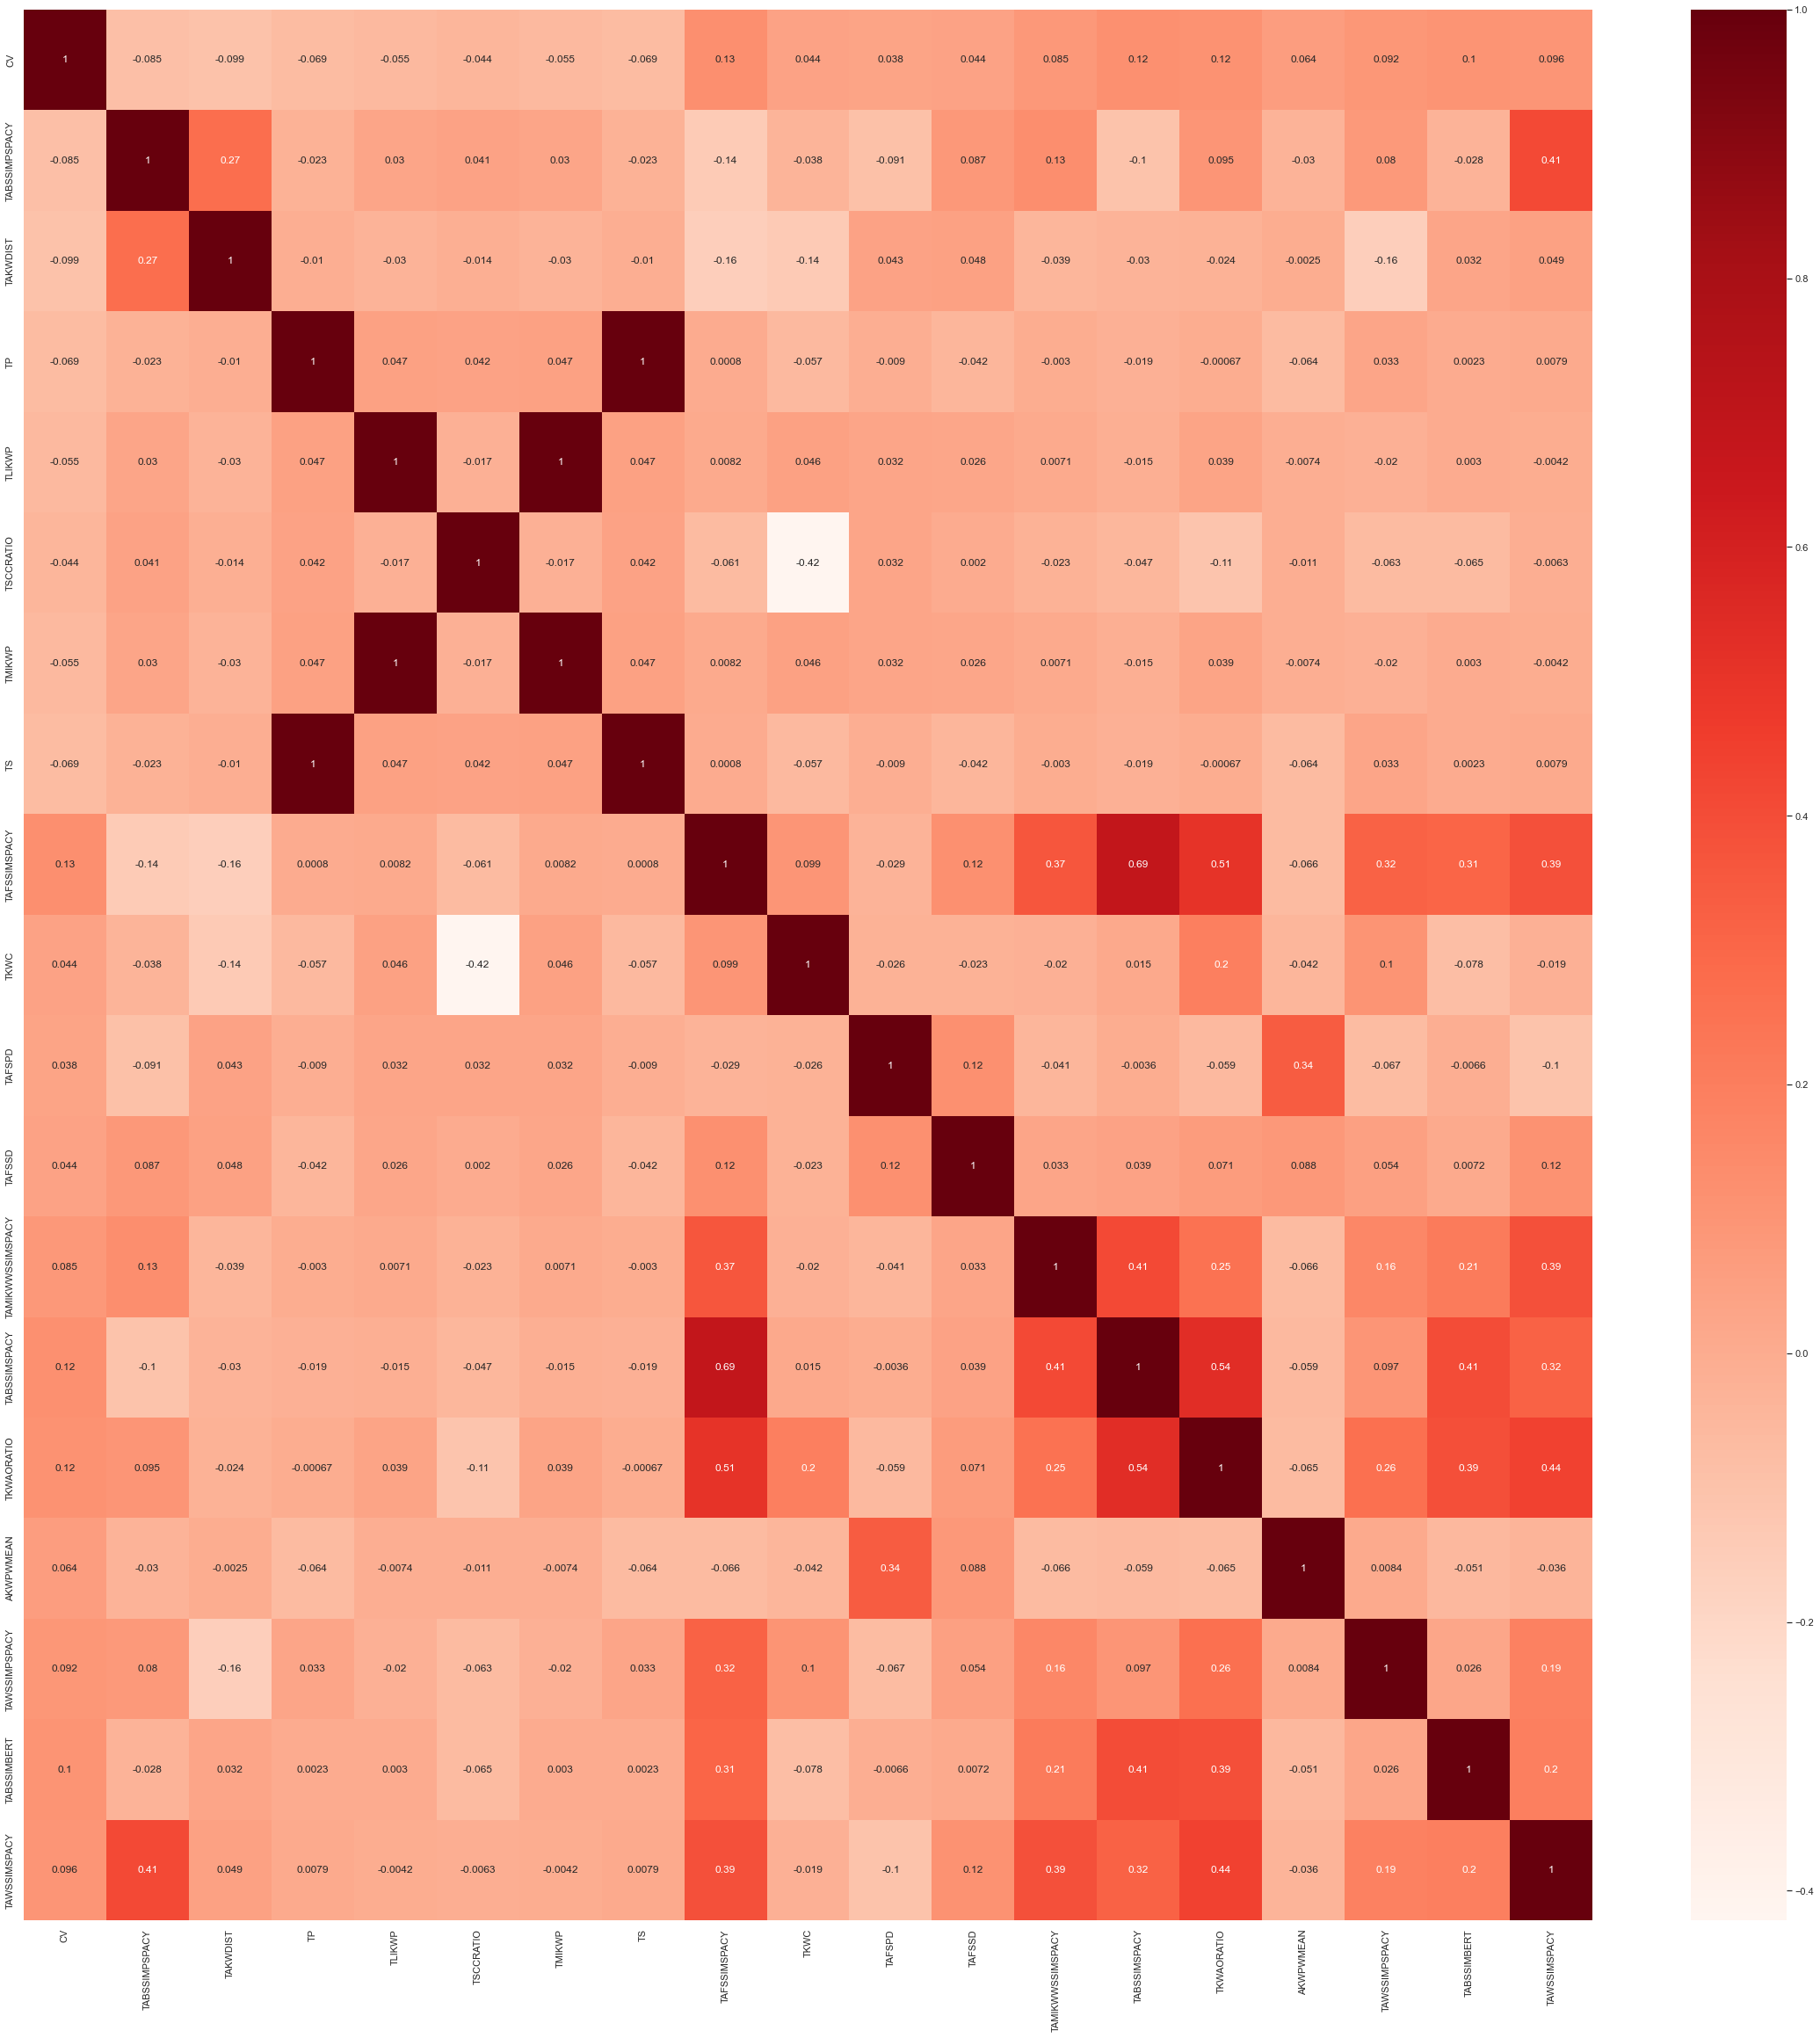

In [353]:
sns.set(rc = {'figure.figsize':(40,40)})
plot = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

In [494]:
fig = plot.get_figure()

In [495]:
fig.savefig('correlation_heatmap_round1.png')

In [496]:
plt.savefig('mp.png')

<Figure size 576x1080 with 0 Axes>

In [618]:
reg = LassoCV(cv=10)

In [619]:
reg.fit(X, y)

LassoCV(cv=10)

In [620]:
print("Best alpha: %f" % reg.alpha_)
print("Best r2 score: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " features and eliminated the other " +  str(sum(coef == 0)) + " features")
#cross_val_score(reg, X, y, cv=10).mean()

Best alpha: 0.019818
Best r2 score: 0.050356
Lasso picked 17 features and eliminated the other 68 features


In [622]:
imp_coef = coef.sort_values()

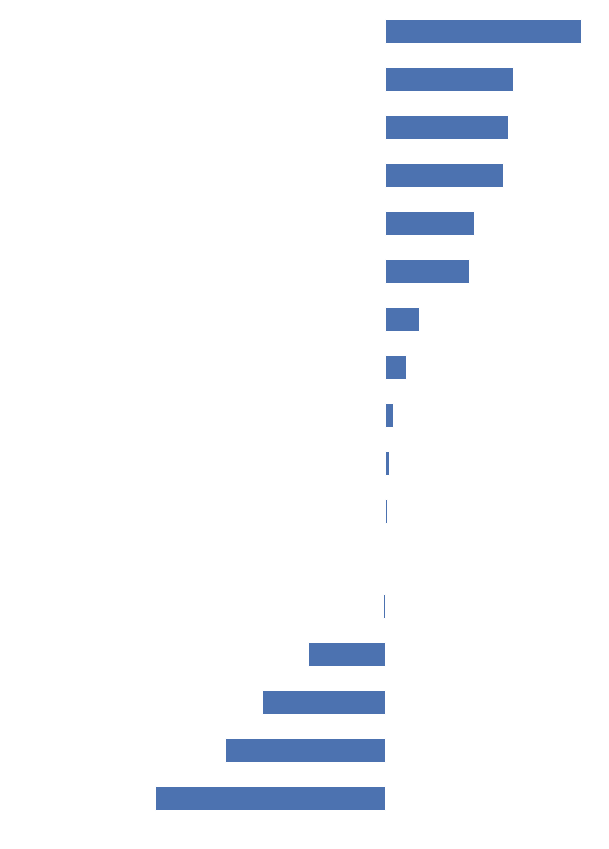

In [628]:
matplotlib.rcParams['figure.figsize'] = (10.0, 15.0)
ax = imp_coef[imp_coef!=0].plot(kind = "barh")
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.patch.set_alpha(0)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
plt.gcf().subplots_adjust(left=0.25)
fig = ax.get_figure()
fig.savefig('../../images/lasso_features.png', transparent=True)

In [632]:
imp_coef_abs = coef.abs().sort_values(ascending=False)
imp_coef_abs[imp_coef_abs!=0].keys()

Index(['TABSSIMPSPACY', 'TAWSSIMSPACY', 'TAKWDIST', 'TABSSIMBERT',
       'TAWSSIMPSPACY', 'TP', 'AKWPWMEAN', 'TKWAORATIO', 'TABSSIMSPACY',
       'TMIKWP', 'TAMIKWWSSIMSPACY', 'TAFSSD', 'TAFSPD', 'TAKWSPD', 'TKWC',
       'TSCCRATIO', 'TAFSSIMSPACY'],
      dtype='object')

In [543]:
pred = reg.predict(X)

In [120]:
['CV', 'TL', 'AL', 'TABSIMSPACY', 'TAKWDIST', 'TAWSSIMSPACY', 'TABSIMBERT', 'AMIKWP']

['CV',
 'TAWSSIMPSPACY',
 'AMIKWP',
 'TABSSIMSPACY',
 'TABSSIMPSPACY',
 'AKWPWMEAN',
 'TASIMSPACY',
 'TMIKWAORATIO',
 'TAFSSIMSPACY',
 'TL',
 'ASC',
 'TSCCRATIO',
 'TAMIKWFP',
 'TAKWDIST',
 'TAMIKWDIST',
 'TABSSIMPSPACY']

In [52]:
reg.score(X,y)

0.06417554753589072

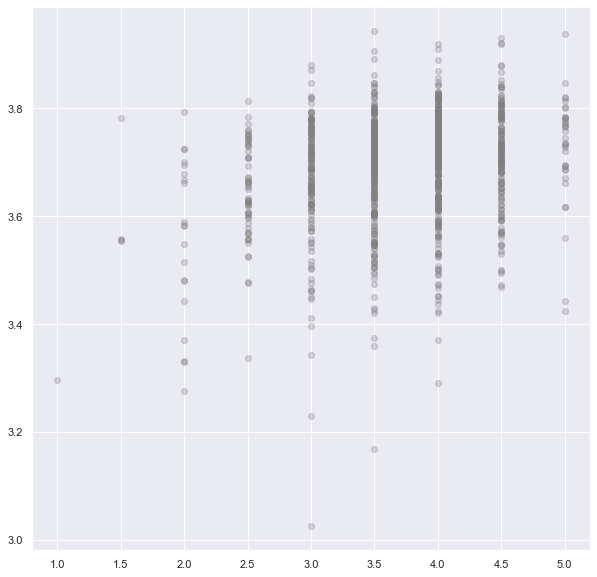

In [563]:
fig = plt.figure(figsize=(10,10))
plt.scatter(y, pred,  color='gray', alpha=0.3)

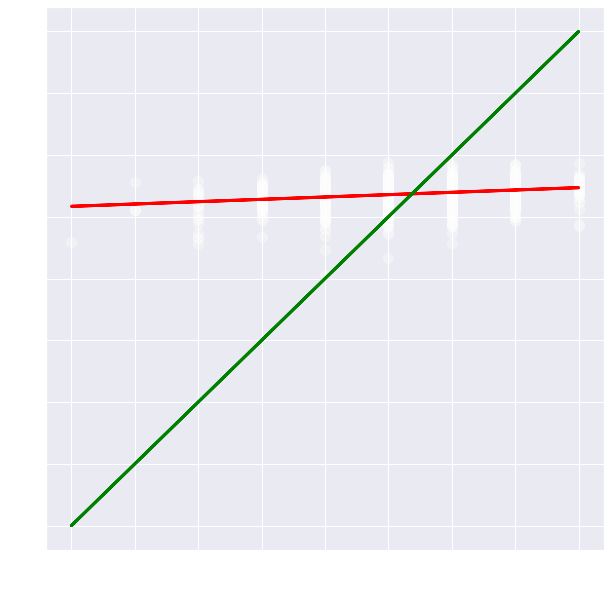

In [584]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(y, pred,  color='white', alpha=0.3, s=100)
m, b = np.polyfit(y, pred, 1)
ax.plot(y, m*y+b, color='red', linewidth=3)
ax.plot(y, y, color='green', linewidth=3)
plt.xlabel("Actual")
plt.ylabel("Prediction")

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')

plt.savefig('../../images/final_model.png', transparent=True)

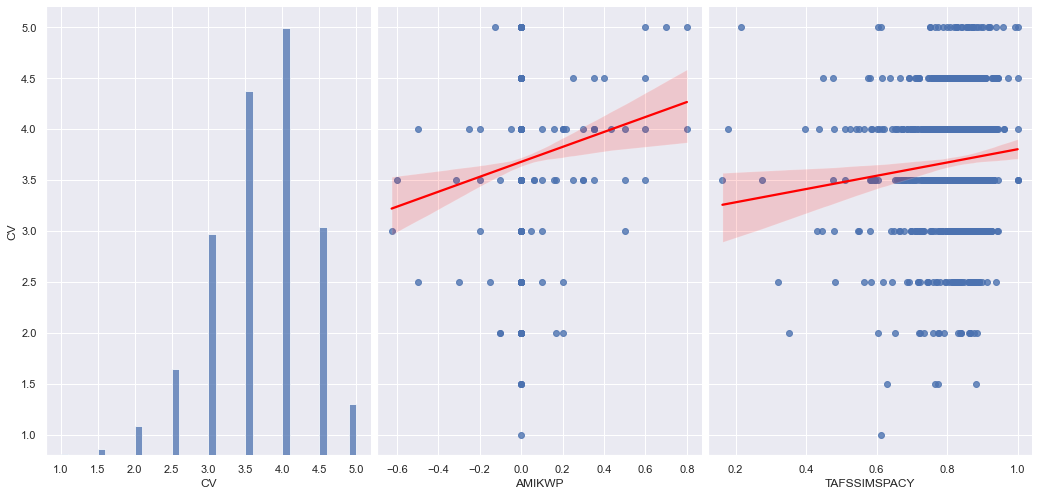

In [1459]:
sns.pairplot(df, x_vars=df.columns[:3], y_vars='CV', height=7, aspect=0.7, kind='reg', plot_kws={'line_kws':{'color':'red'}})

In [185]:
df['TABSSIMPSPACY']

,TABSSIMPSPACY,TABSSIMPSPACY
0,0.062500,0.062500
1,0.052632,0.052632
2,0.142857,0.142857
3,0.090909,0.090909
4,0.200000,0.200000
...,...,...
962,0.062500,0.062500
963,0.040000,0.040000
964,0.986111,0.986111
965,0.128571,0.128571


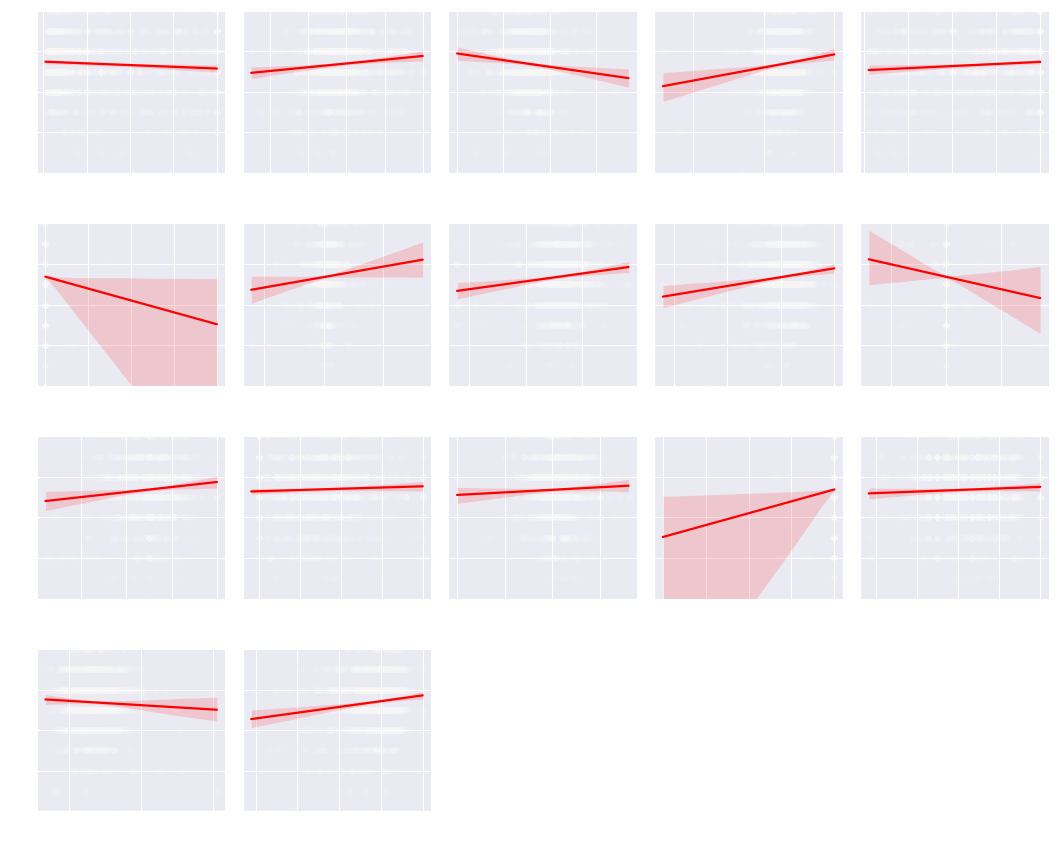

In [639]:
y_name = 'CV'
features_names = [f'{i}' for i in X.columns]  
column_names = features_names + [y_name]

plot_size=7
num_plots_x=5   # No. of plots in every row
num_plots_y = math.ceil(len(features_names)/num_plots_x)   # No. of plots in y direction

g = sns.FacetGrid(pd.DataFrame(features_names), col=0, col_wrap=5, sharex=False)
for ax, x_var in zip(g.axes, features_names):
    ax.set(ylim=(1, 5))
    sns.regplot(data=df, x=x_var, y=y_name, ax=ax, scatter_kws={"color": "white", "alpha" : 0.1}, line_kws={"color": "red"})
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')

    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    ax.spines['left'].set_color('white')
    ax.spines['top'].set_color('white')
g.tight_layout()
fig = g.fig
fig.savefig('../../images/feature_regression.png', transparent=True)

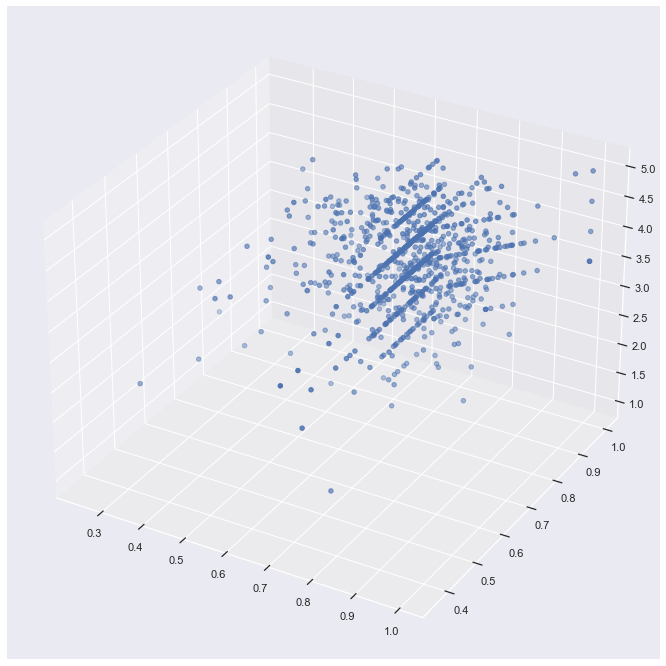

In [367]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

sequence_containing_x_vals = df['TAMIKWWSSIMSPACY']
sequence_containing_y_vals = df['TABSSIMSPACY']
sequence_containing_z_vals = df['CV']

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.show()

In [389]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression()

In [390]:
from sklearn.model_selection import cross_val_score
cross_val_score(lin_reg, X, y, cv=10).mean()

0.0028716666853004892

In [ ]:
x_vars = [f'{i}' for i in X.columns]  
y_var = "CV"

g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=2, sharex=False)
for ax, x_var in zip(g.axes, x_vars):
    sns.scatterplot(data=df, x=x_var, y=y_var, ax=ax)
g.tight_layout()

Text(0, 0.5, 'Title length')

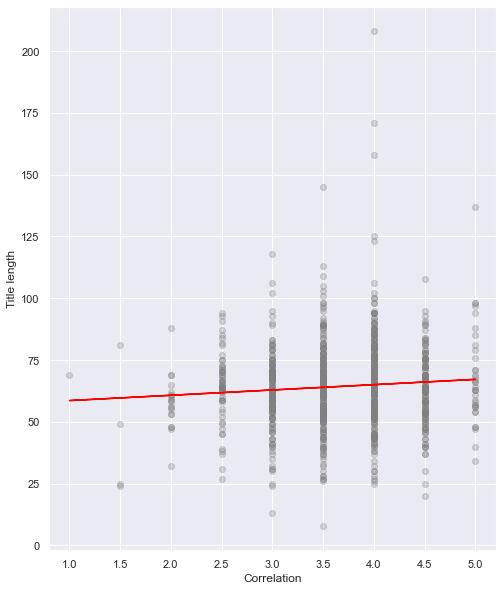

In [1419]:
plt.scatter(y, df['TL'],  color='gray', alpha=0.3)
m, b = np.polyfit(y, df['TL'], 1)
plt.plot(y, m*y+b, color='red')
plt.xlabel("Correlation")
plt.ylabel("Title length")

Text(0, 0.5, 'Title word count')

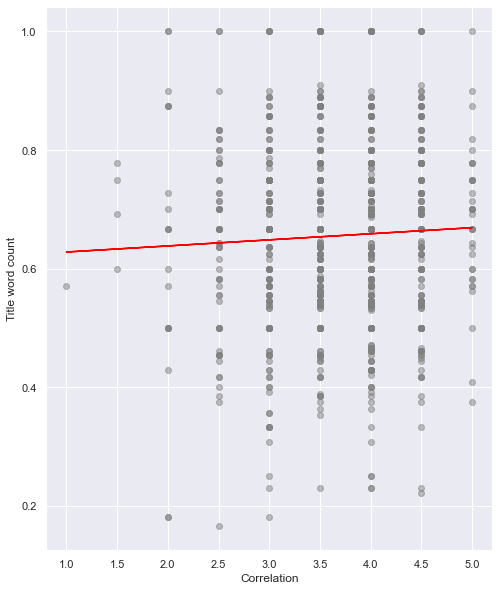

In [893]:
plt.scatter(y, df['TKWC'],  color='gray', alpha=0.5)
m, b = np.polyfit(y, df['TKWC'], 1)
plt.plot(y, m*y+b, color='red')
plt.xlabel("Correlation")
plt.ylabel("Title word count")

Text(0, 0.5, 'Article sentence count')

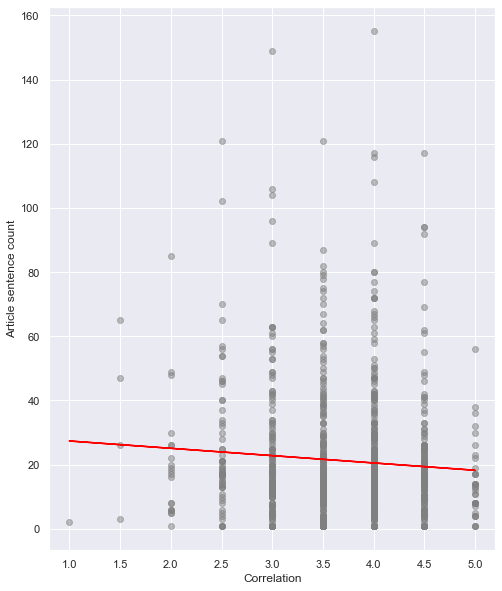

In [894]:
plt.scatter(y, df['ASC'],  color='gray', alpha=0.5)
m, b = np.polyfit(y, df['ASC'], 1)
plt.plot(y, m*y+b, color='red')
plt.xlabel("Correlation")
plt.ylabel("Article sentence count")

Text(0, 0.5, 'Title special character ratio')

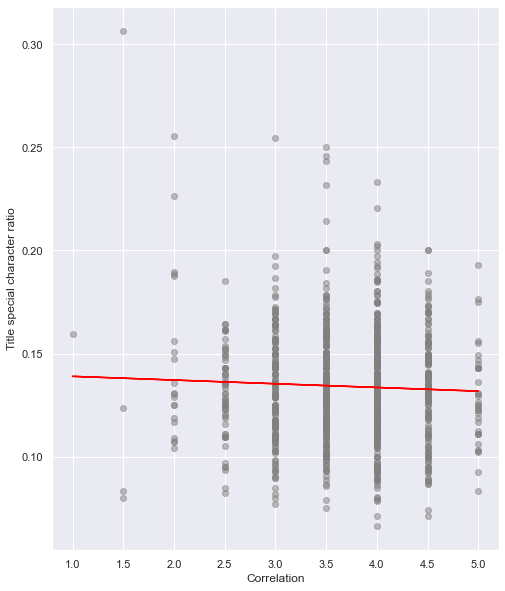

In [895]:
plt.scatter(y, df['TSCCRATIO'],  color='gray', alpha=0.5)
m, b = np.polyfit(y, df['TSCCRATIO'], 1)
plt.plot(y, m*y+b, color='red')
plt.xlabel("Correlation")
plt.ylabel("Title special character ratio")

In [326]:
df_sf = df.drop(df.columns.difference(['TL', 'ASC', 'CV']), 1)

C:\Users\tobia\AppData\Local\Temp/ipykernel_49480/4250296106.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_sf = df.drop(df.columns.difference(['TL', 'ASC', 'CV']), 1)


In [327]:
df_sf

,CV,TL,ASC
0,1.209448,0.212485,-0.255190
1,-1.018240,-0.020676,-0.109029
2,1.209448,-1.011607,-0.693673
3,-0.275677,0.503935,0.037132
4,-1.018240,0.154194,-0.791114
...,...,...,...
962,-0.275677,-0.720157,2.083388
963,0.466885,1.786317,0.183293
964,0.466885,-1.885959,2.473151
965,-1.760802,1.028546,2.375710


In [1192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [1193]:
regressor = LinearRegression()

In [1194]:
regressor.fit(X_train, y_train)

LinearRegression()

In [1195]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

In [1196]:
y_pred = regressor.predict(X_test)

In [1197]:
pred_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [1198]:
metrics.mean_absolute_error(y_test, y_pred)

0.530905627285731

In [1199]:
metrics.mean_squared_error(y_test, y_pred)

0.4429563500281264

In [1200]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.6655496600766365

In [1201]:
metrics.r2_score(y_test, y_pred)

-0.020386881290453296

In [1202]:
X = df_sf.drop(columns='CV')

In [1203]:
y = df_sf['CV']

In [1204]:
y_test

537    3.5
857    1.5
300    4.5
228    4.5
651    3.0
      ... 
793    4.0
693    4.0
755    3.5
802    3.5
897    4.0
Name: CV, Length: 242, dtype: float64

C:\Users\tobia\AppData\Local\Temp/ipykernel_49480/2705489424.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  plt.scatter(X_test.drop(X_test.columns.difference(['TL']), 1), y_test,  color='gray')


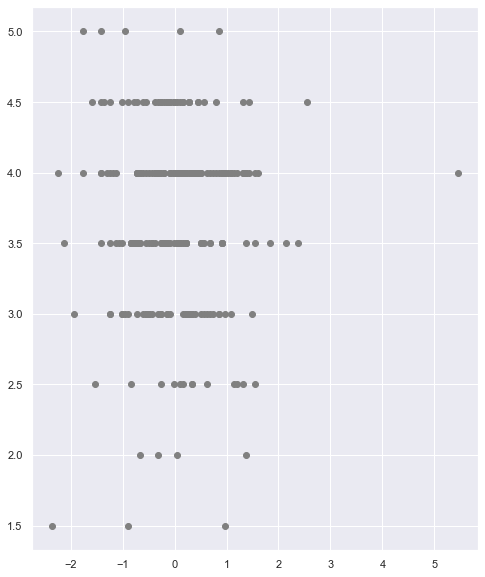

In [1205]:
plt.scatter(X_test.drop(X_test.columns.difference(['TL']), 1), y_test,  color='gray')

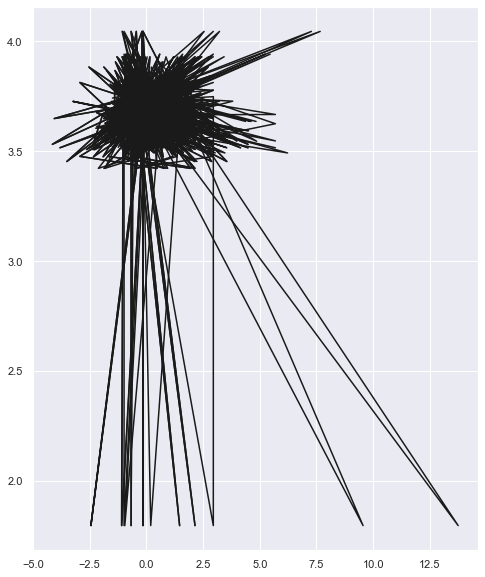

In [1206]:
plt.plot(X_test, y_pred, color ='k')

In [1207]:
X_test.drop(X_test.columns.difference(['TL']), 1).shape

C:\Users\tobia\AppData\Local\Temp/ipykernel_49480/3293136230.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_test.drop(X_test.columns.difference(['TL']), 1).shape


(242, 1)

In [1208]:
y_test.shape

(242,)

In [1209]:
y_test

537    3.5
857    1.5
300    4.5
228    4.5
651    3.0
      ... 
793    4.0
693    4.0
755    3.5
802    3.5
897    4.0
Name: CV, Length: 242, dtype: float64

In [1210]:
X_test

,TL,AL,TWC,AWC,TSC,ASC,TALRATIO,TAWCRATIO,TASCRATIO,TP,AP,TAPD,TAPMEAN,TS,AS,TASD,TASMEAN
537,-1.419638,-0.685057,-1.496003,-0.710842,-0.150981,-0.596233,-0.241240,-0.231132,-0.218696,2.143040,1.295538,-1.446476,2.297774,2.143040,1.295538,-1.446476,2.297774
857,-2.352280,1.753013,-1.833135,1.716101,-0.150981,1.255141,-0.503459,-0.461728,-0.539040,-0.196395,0.479321,0.436587,0.042197,-0.196395,0.479321,0.436587,0.042197
300,-0.370416,0.233211,-0.484606,0.202501,-0.150981,-0.011588,-0.396570,-0.375394,-0.445104,-0.196395,-0.269740,0.055790,-0.274403,-0.196395,-0.269740,0.055790,-0.274403
228,0.270775,0.307229,1.538188,0.435694,-0.150981,0.475616,-0.379636,-0.327409,-0.499880,-0.196395,-0.046822,0.169114,-0.180184,-0.196395,-0.046822,0.169114,-0.180184
651,0.329065,-0.420548,0.526791,-0.423668,-0.150981,-0.401351,-0.217865,-0.192738,-0.340608,0.973323,1.132471,-0.380373,1.273556,0.973323,1.132471,-0.380373,1.273556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,1.203416,-0.315345,1.538188,-0.199111,-0.150981,-0.303910,-0.201032,-0.211413,-0.377181,-0.196395,0.969457,0.685756,0.249360,-0.196395,0.969457,0.685756,0.249360
693,-0.661867,0.043847,-0.821738,-0.030693,-0.150981,0.037132,-0.388156,-0.365728,-0.452823,-0.196395,0.152062,0.270220,-0.096123,-0.196395,0.152062,0.270220,-0.096123
755,0.095904,-0.105691,-0.484606,-0.095469,-0.150981,-0.206470,-0.327458,-0.340851,-0.405150,-0.196395,0.432428,0.412749,0.022378,-0.196395,0.432428,0.412749,0.022378
802,2.369218,1.177405,2.212453,1.139594,-0.150981,1.596184,-0.388088,-0.364059,-0.548875,-0.196395,0.187379,0.288174,-0.081196,-0.196395,0.187379,0.288174,-0.081196


In [1211]:
correlation = df.corr(method='pearson')

In [1212]:
columns = correlation.nlargest(10, 'CV').index

In [1213]:
columns

Index(['CV', 'TL', 'TWC', 'TALRATIO', 'TAWCRATIO', 'TASCRATIO', 'TAPD', 'TASD',
       'TSC', 'AP'],
      dtype='object')

In [246]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

In [247]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.478565 (0.063602)
ScaledLASSO: -0.454179 (0.074021)
ScaledEN: -0.454179 (0.074021)
ScaledKNN: -0.523328 (0.096289)
ScaledCART: -0.945954 (0.102555)
ScaledGBM: -0.478100 (0.068824)


In [1216]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,200,300,400]))
model = GradientBoostingRegressor(random_state=21)
kfold = KFold(n_splits=10, random_state=21, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-0.486104 (0.059054) with: {'n_estimators': 50}
-0.511704 (0.064480) with: {'n_estimators': 100}
-0.545187 (0.064650) with: {'n_estimators': 200}
-0.566514 (0.063031) with: {'n_estimators': 300}
-0.586267 (0.065147) with: {'n_estimators': 400}
Best: -0.486104 using {'n_estimators': 50}
